# Weather and Electric Load Forecasting <br/> ... (from scratch) with Python Data Science Tools
* * * * 

**Nelson Correa, *Ph.D.*** <br/>
*NLP, Data Science and Machine Learning* <br/>
West Palm Beach, FL <br/>
[@nelscorrea](https://twitter.com/nelscorrea)
Jan. 10, 2019

* * * * 
**PyData Miami 2019**, Jan. 9-11, 2019
* https://pydata.org/miami2019/ - [@pydatamiami](https://twitter.com/pydatamiami)


<br/>
**Github Jupyter notebooks**:
* https://github.com/u/nelscorrea/PyDataMiami2019/

<hr/>



## Sources and acknowledgements, 1

<hr/>
**NOAA/NCDC, National Oceanic and Atmospheric Administration** 
* https://www.ncdc.noaa.gov - [@NOAANCEIclimate](https://twitter.com/@NOAANCEIclimate)

**IEEE GEFCON2012 & Dr. Tao Hong**, UNC Charlotte, NC
* http://www.gefcom.org - [@DrHongTao](https://twitter.com/DrHongTao)

<hr/>
<table>
<tr>
    <td>
    <img src="./images/NOAANCEIclimate_400x400.jpg"  width=150px> 
    </td>
    <td></td>
    <td></td>
    <td>
    <img src="./images/ieee-power-energy-logo.png"> 
    </td>
</tr>
</table>


## Sources and acknowledgements, 2

<hr/>
**Wes McKinney**, *Python for Data Analysis* (Pandas) - 
[@wesmckinn](https://twitter.com/wesmckinn)

**Jake van der Plas**, *Python Data Science Handbook* (Scikit-Learn) - 
[@jakevdp](https://twitter.com/jakevdp)

<hr/>
<table>
<tr>
    <td>
    <img src="./images/mckinney_pda2nd.jpg"  width=120px> 
    </td>
    <td></td>
    <td></td>
    <td>
    <img src="./images/jakevdp_pdsh.jpg"  width=120px> 
    </td>
</tr>
</table>

<hr/>



# Outline 

#### Preliminaries (~ 5 min)
* Python data science tools
* Time series and data forecasting

#### Weather forecasting (~ 10 min)
* Datasets (NOAA)
* Description & visualization
* Models, seasonality (yearly), model evaluation

#### Electric load forecasting (~ 7 min)
* Datasets (GEFCON2012 Load)
* Description & visualization
* Models, seasonality (yearly, hourly, other), model evaluation

#### Conclusion (~ 3 min)
* Advanced models and further work
* References, Github Jupyter notebooks



# Preliminaries

## Python data science tools

* Python, NumPy 
  * numpy.ndarray; datetime
* Pandas
  * pandas.DataFrame, pivot_table, melt
  * time series, multidimensional indices
* Scikit-Learn
  * sklearn.linear_model.LinearRegression
  * sklearn.preprocessing.PolynomialFeatures
  * sklearn.pipeline.make_pipeline
* Matplotlib



## Time series and data forecasting

### Time series 

A *time series* is a series of *values*, each with a *time stamp*. 
We may think of *time* as a single *input feature*, which defines an ordering of the values. 

> $y_t$ is a scalar or vector variable, for independent time variable $t$

Formally, in a *time series*, time $t$ is the main or only input feature (independent variable), and there are one or more time-dependent variables $y_0, y_1, ..., y_t$ defining a univariate or multivariate time series. Time may be in any unit, year, month, day, hour, ..., datetime().

Time series may exhibit trends, seasonality and cycles, which are functions of time.

> trends, seasonality and cycles

Lastly, time-series may exhibit rare (gray swan) and extremely rare (black swan) events 
(cf. Nicolas Taleb, The Black Swan: The Impact of the Highly Improbable, 2010).



### Time series forecasting

In *forecasting*, we want to make a *prediction* $\hat{y}_t = f(t)$ of the actual value of $y_t$ at time $t$, with a *confidence interval* for the predicted value.

> $\hat{y}_t = f(t)$

Feature engineering with time series analysis is usually limited to time-determined features that capture trends, seasonality and cycles of the time series:
- trends: increase, decrease of values $y_t$ the time series with time
- seasonality: cycles with a fixed period (e.g., yearly or daily variation of values)
- cycles: recurring patterns without fixed period (e.g., economic cycles; warming or cooling periods, etc.)

<hr/>



### Time series forecasting methods

The independent variable of a time series is time. It is often to include lagged values of the output variable or variables, leading to different models: 

* Vector autoregressive (VAR)
* Exponential smoothing models
* Autoregressive Integrated Moving Average (ARIMA)
* Seasonal AutoRegressive Integrated Moving Average (SARIMA)
* Recurrent and autoregressive neural networks (RNN, NNAR)

In this talk we present a baseline model with *linear regression* and *seasonality* features added.

<hr/>



# PyData Part I - Weather forecasting
* Datasets (NOAA)
* Visualization & analysis
* Features and models, model evaluation


## NCDC Weather Data


### GHCN-Daily: Global Historical Climate Network

* NOAA: 9,887 weather stations

Climate Data Online: https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND

* **Daily Summaries**: 
Global Historical Climate Network includes daily land surface observations from around the world. 
The station dataset includes max and minimum temperatures, total precipitation, snowfall, and depth of snow on ground. 

* **Hourly Summaries**: 
The 1981-2010 Normals comprise all climate normals using the thirty year period of temperature, degree days, precipitation, snowfall, snow depth, wind, etc.


In [2]:
# Imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Read NOAA NCDC weather data: predownload from https://www.ncdc.noaa.gov/cdo-web
weather_SYR = pd.read_csv('NOAA_data/USSYR-ZIP13210-1922-2017-1526037.csv', 
                          index_col='DATE', parse_dates=True)
weather = pd.read_csv('NOAA_data/USW00012839-FL-Miami-1927-2018-1535674.csv', 
                          index_col='DATE', parse_dates=True)
print("SYR weather shape:", weather_SYR.shape, 
                          " -- MIA weather shape:", weather.shape)

SYR weather shape: (11767, 16)  -- MIA weather shape: (54265, 87)


/Users/nelson/Dev/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,9,11,13,15,17,19,23,29,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
weather_SYR.head(3)

,STATION,NAME,DAPR,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF,WT03,WT04,WT08
DATE,,,,,,,,,,,,,,,,
1922-01-01,USC00308380,"SYRACUSE, NY US",NaN,NaN,NaN,0.42,0.0,5.0,32.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1922-01-02,USC00308380,"SYRACUSE, NY US",NaN,NaN,NaN,0.00,0.0,1.0,4.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
1922-01-03,USC00308380,"SYRACUSE, NY US",NaN,NaN,NaN,0.23,0.0,3.0,18.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Select subset of MIA features
weather_features = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 
                'TMAX', 'TMIN', 'PRCP', 'SNOW', 'TAVG', 'AWND', 'WSF1', 'WSF5', 'WDF1', 'WDF5']
weather[weather_features].head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,PRCP,SNOW,TAVG,AWND,WSF1,WSF5,WDF1,WDF5
DATE,,,,,,,,,,,,,,,
1948-01-01,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",25.7881,-80.3169,8.8,81.0,69.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1948-01-02,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",25.7881,-80.3169,8.8,81.0,69.0,0.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1948-01-03,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",25.7881,-80.3169,8.8,72.0,60.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Weather stations in the data
print("SYR Stations:", weather_SYR['STATION'].unique())
print("MIA Stations:", weather['STATION'].unique())

SYR Stations: ['USC00308380' 'USC00308386' 'US1NYOG0020']
MIA Stations: ['USW00012839' 'USW00092811']


> <hr/>


## STATIONS - Syracuse, NY

    SYR USC00308386 - NY SUNY ESF SYRACUSE (date range 2001-2015; data gap 2004-2008)
    SYR USW00014771 - NY SYRACUSE HANCOCK INTL AP (date range 1922-1941)


## STATIONS - Miami, FL

    MIA USW00012839 - MIAMI INTERNATIONAL AIRPORT, FL US (date range 1948-2017)
    MIA USW00092811 - MIAMI BEACH, FL US (date range 1925-2017; data gaps 1931-1940; 2001-2003)


### All NOAA weather stations: allstations.csv

`$ wc allstations.txt >>     9887   73206  850282`
* 9887 stations



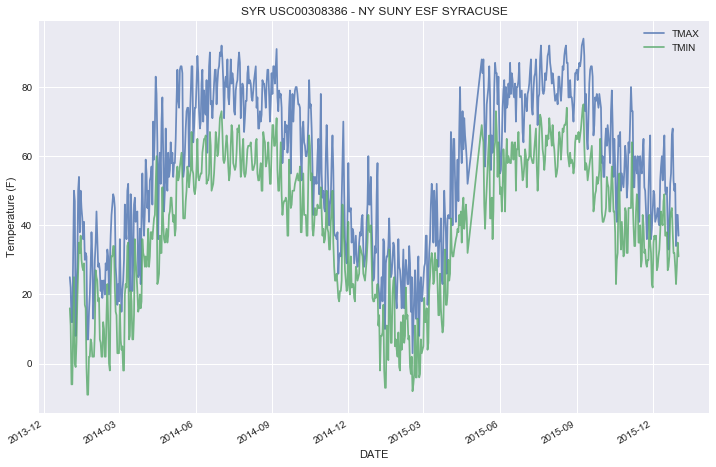

In [7]:
# USC00308386 SYR, 2 year plot 2014-2016; yearly seasonality
weather_SYR[weather_SYR['STATION']=='USC00308386']['2014-01-01':'2016-01-01'][['TMAX', 'TMIN']].plot(alpha=0.8, 
        title='SYR USC00308386 - NY SUNY ESF SYRACUSE', figsize=(12,8));
plt.ylabel('Temperature (F)');

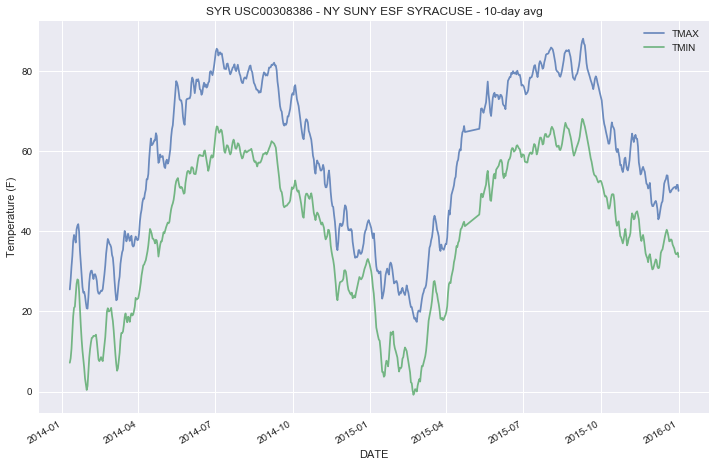

In [8]:
# USC00308386 SYR, 2 year plot 2014-2016; yearly seasonality
# SYR 10-day Moving Average (MA) TMAX, TMIN - pandas.DataFrame.rolling() window
weather_SYR[weather_SYR['STATION']=='USC00308386']['2014-01-01':'2016-01-01'][['TMAX', 'TMIN']].rolling(10).mean().plot(alpha=0.8, 
                        title='SYR USC00308386 - NY SUNY ESF SYRACUSE - 10-day avg', figsize=(12,8));
plt.ylabel('Temperature (F)');

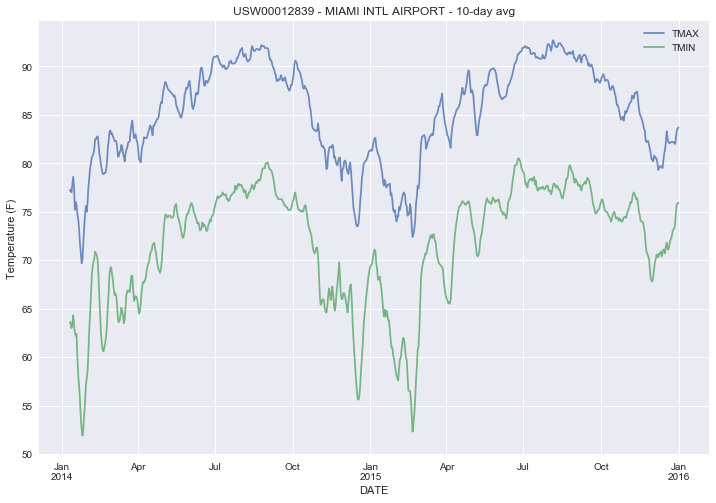

In [9]:
# MIA, 2 year plot 2014-01-01:2016-01-01; USW00012839
# MIA 10-day Moving Average (MA) TMAX, TMIN - pandas.DataFrame.rolling() window
weather[weather['STATION']=='USW00012839']['2014-01-01':'2016-01-01'][['TMAX','TMIN']].rolling(10
    ).mean().plot(alpha=0.8, title='USW00012839 - MIAMI INTL AIRPORT - 10-day avg', figsize=(12,8));
plt.ylabel('Temperature (F)');


## Temperature differences: Season and Location

The TMAX-TMIN temperature difference is about 20F degree for SYR, and about 15F degrees for MIA.


### Season vs. Location (SYR, MIA)

* Winter  SYR 5-25F, MIA 60-75F
* Summer  SYR 60-80F, MIA 78-93F



## Full dataset date-ranges (TMAX, TMIN)

* MIA USW00012839 - MIAMI INTERNATIONAL AIRPORT, FL US 
    - (date range 1948-2017, 70 years)
* MIA USW00092811 - MIAMI BEACH, FL US 
    - (date range 1925-2017, 92 years; gaps 1931-1940; 2001-2003)


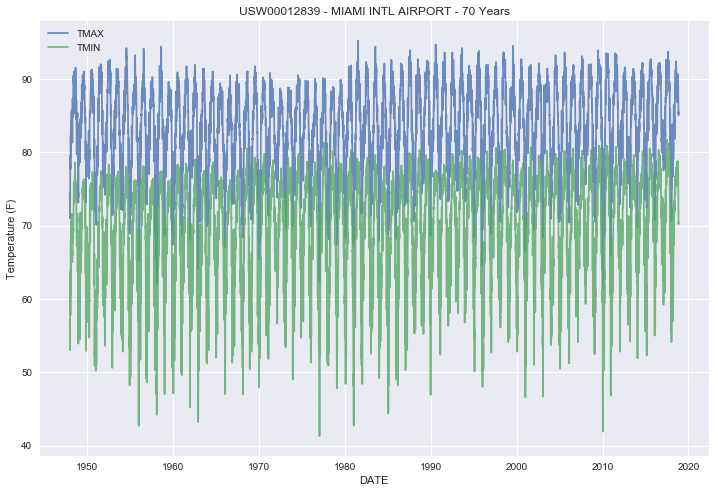

In [10]:
# MIA USW00012839 - MIAMI INTL AIRPORT, 1948-2017, Temperature
weather[weather['STATION']=='USW00012839'][['TMAX','TMIN']].rolling(10).mean(
    ).plot(alpha=0.8, title='USW00012839 - MIAMI INTL AIRPORT - 70 Years', figsize=(12,8));
plt.ylabel('Temperature (F)');

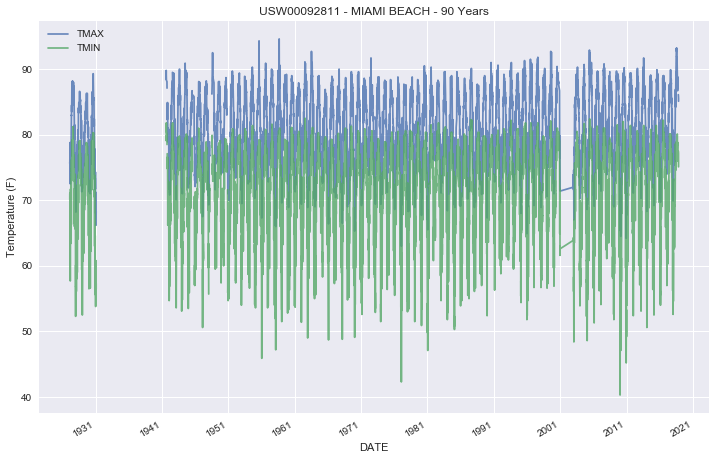

In [11]:
# MIA USW00092811 - MIAMI BEACH, 1948-2017, Temperature
weather[weather['STATION']=='USW00092811'][['TMAX','TMIN']].rolling(10).mean(
    ).plot(alpha=0.8, title='USW00092811 - MIAMI BEACH - 90 Years', figsize=(12,8));
plt.ylabel('Temperature (F)');

> <hr/>

## NOAA Weather data types


#### Temperature
    TAVG - Average Temperature.
    TMIN - Minimum temperature
    TMAX - Maximum temperature
    TOBS - Temperature at the time of observation

#### Precipitation
    PRCP - Precipitation
    other ..

#### Precipitation - Snow
    SNOW - Snowfall
    SNWD - Snow depth
    other ...

#### Wind
    AWND - Average wind speed
    WSF1 - Fastest 1-minute wind speed
    WSF2 - Fastest 2-minute wind speed
    WSF5 - Fastest 5-second wind speed

    WDF1 - Direction of fastest 1-minute wind
    other ...

#### Sunshine
    TSUN - Total sunshine for the period
    PSUN - Daily percent of possible sunshine for the period
    ACSH - Average cloudiness sunrise to sunset from manual observations
    ACMH - Average cloudiness midnight to midnight from manual observations

#### Weather Type
    Weather Types (Misses WT12, WT15, WT17, WT19, WT20):
    WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
    other ...
    WT11 - High or damaging winds
    WT13 - Mist
    WT14 - Drizzle
    WT16 - Rain (may include freezing rain, drizzle, and freezing drizzle)" 
    WT18 - Snow, snow pellets, snow grains, or ice crystals
    WT21 - Ground fog 


## Major Florida hurricanes 1965 - 2017

### Wind Speed Data - AWND, WSF1, WSF2, WSF5

* MIA USW00012839 - MIAMI INTL AIRPORT, 1948-2017
* Major Florida hurricanes 
    - 1965, 1975, 1980, 1992 (Andrew), 1999, 2005, 2017 (Irma)
* WSF2 data outlier in 1999 (780 mph)


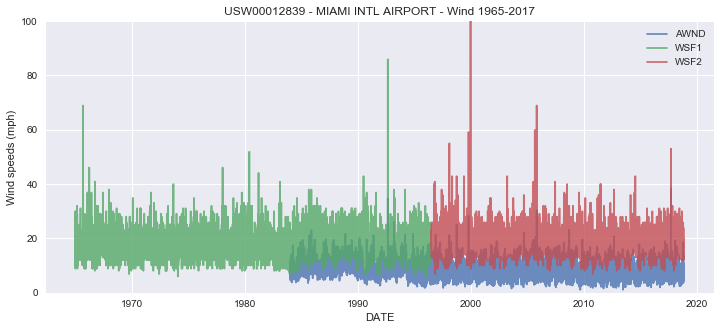

In [38]:
# MIA USW00012839, 1948-2017, Wind - different date ranges for AWND, WSF1, WSF2
weather[weather['STATION']=='USW00012839'][['AWND','WSF1','WSF2']].plot(alpha=0.8, 
    title='USW00012839 - MIAMI INTL AIRPORT - Wind 1965-2017', figsize=(12,5));
plt.ylim((0,100))
plt.ylabel('Wind speeds (mph)');


In [14]:
# MIA USW00012839 - MIAMI INTL AIRPORT, weather feature description
weather[weather['STATION']=='USW00012839'][weather_features].describe()

,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,PRCP,SNOW,TAVG,AWND,WSF1,WSF5,WDF1,WDF5
count,2.587700e+04,2.587700e+04,2.587700e+04,25876.000000,25876.000000,25876.000000,19810.0,4722.000000,12725.000000,11504.000000,8148.000000,11504.000000,8148.000000
mean,2.578810e+01,-8.031690e+01,8.800000e+00,83.535284,69.482725,0.167502,0.0,77.724693,8.392009,16.864204,23.642943,154.155946,150.751105
std,4.636381e-12,2.035034e-11,3.758844e-12,6.515358,8.418193,0.503725,0.0,6.919057,3.181635,4.415732,9.445256,92.420861,84.665569
min,2.578810e+01,-8.031690e+01,8.800000e+00,45.000000,30.000000,0.000000,0.0,0.000000,1.120000,6.000000,6.900000,10.000000,10.000000
25%,2.578810e+01,-8.031690e+01,8.800000e+00,80.000000,65.000000,0.000000,0.0,74.000000,6.040000,14.100000,19.900000,90.000000,90.000000
50%,2.578810e+01,-8.031690e+01,8.800000e+00,84.000000,72.000000,0.000000,0.0,79.000000,8.050000,16.100000,23.000000,130.000000,130.000000
75%,2.578810e+01,-8.031690e+01,8.800000e+00,89.000000,75.000000,0.070000,0.0,83.000000,10.290000,19.900000,25.900000,200.000000,190.000000
max,2.578810e+01,-8.031690e+01,8.800000e+00,98.000000,84.000000,14.850000,0.0,89.000000,38.480000,85.900000,708.900000,360.000000,360.000000



# Weather Forecasting - Temperature


Climate is the statistics of weather over long periods of time.

#### Reference
* https://en.wikipedia.org/wiki/Climate
* https://en.wikipedia.org/wiki/Weather


### Input features: Date (DATE) ; target feature: temperature (TMAX, TMIN)
* Temperature prediction as a function of time (DATE) and previous temperature only 
* Seasonality variable `season` introduced, as np.sin(date), with period 365.25, phase 0-90 days
* Train on historical data (e.g., past 10, 30, 50, 70 years)




#### Length of forecast (test) period
* one year or longer
* 10-day, 7-day, 3-day, 1-day

### Weather Prediction Models

#### Date (DATE) vs temperature (TMAX, TMIN), one year ahead

* train 1941-2015; test 2016-2017
* per year, train past 20 years; predict next year
* Determine train mean, intercept_, slope coefs_[0]

#### Date, with season variable sin() - (DATE, SEASON) 
* Target variable temperature (TMAX, TMIN), one year ahead
* Introduce season variable (SEASON), as np.cos() period 365.25 + phase 0-90 days

* train 1941-2015; test 2016-2017
* per year, train past 20 years; predict next year
* Determine train mean, intercept_, slope coefs_[0]


### Linear Prediction Model - Part I

* Training data: 1948-01-01 to 2010-12-31 (62 years)
* Model input feature: data index 'DATE', with no seasonality
* Time index is datetime(); 1 nanosecond time resolution


In [15]:
# imports and models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model_mia_linear = LinearRegression(fit_intercept=True)
model_mia_polynomial = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [16]:
# Define training data and outputs: train dates 1948-01-01 to 2010-12-31 (62 years)
train_end_date = '2010-12-31'
train_dates = weather[weather['STATION']=='USW00012839'][:train_end_date].index

X = train_dates[:, np.newaxis].astype('float64') * 1e-17
y = weather[weather['STATION']=='USW00012839'][:train_end_date][['TMAX','TMIN']]
print("X.shape:", X.shape, "y.shape:", y.shape)

# Train model
model_mia_linear.fit(X, y)

X.shape: (23011, 1) y.shape: (23011, 2)


/Users/nelson/Dev/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Model score and coefficients: X as training date_range()
start_date = '1948-01-01'
end_date = '2010-12-31'
score_dates = pd.date_range(start_date, end_date)[:, np.newaxis]
score_dates_float64 = score_dates.astype('float64') * 1e-17
print("model_mia_linear.coef_:", model_mia_linear.coef_)
print("model_mia_linear.intercept_:", model_mia_linear.intercept_)
print("model_mia_linear.score:", model_mia_linear.score(score_dates_float64, y))

model_mia_linear.coef_: [[0.08521131]
 [0.14720108]]
model_mia_linear.intercept_: [83.10021582 68.79008727]
model_mia_linear.score: 0.008241949448928858


### Model slope on 'date'
* slope: +0.14720108
* Pandas DatetimeIndex datetime() is converted to float64 - 1 ns resolution

In [18]:
# Apply on training data
weather_predict = weather[weather['STATION']=='USW00012839'][:train_end_date][['TMAX','TMIN']]
weather_predict['pTMAX'] = model_mia_linear.predict(score_dates_float64)[:,0]
weather_predict['pTMIN'] = model_mia_linear.predict(score_dates_float64)[:,1]

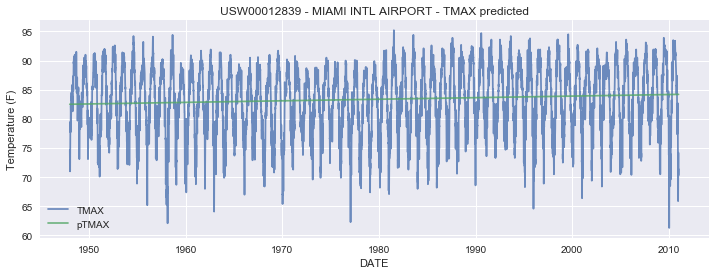

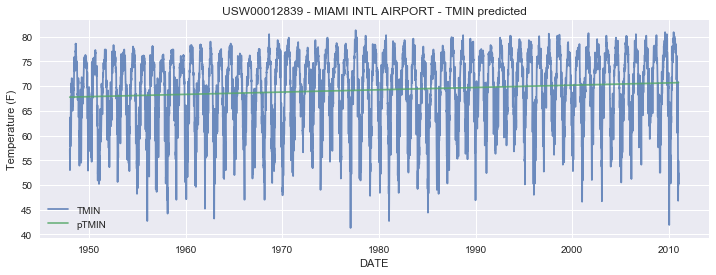

In [19]:
# Plot USW00012839, 1948-2017, Temperature on training data
weather_predict[['TMAX','pTMAX']].rolling(10).mean().plot(alpha=0.8, figsize=(12,4), title='USW00012839 - MIAMI INTL AIRPORT - TMAX predicted');
plt.ylabel('Temperature (F)');
weather_predict[['TMIN','pTMIN']].rolling(10).mean().plot(alpha=0.8, figsize=(12,4), title='USW00012839 - MIAMI INTL AIRPORT - TMIN predicted');
plt.ylabel('Temperature (F)');

In [20]:
# Define prediction error (MSE, RMSE)
def prediction_error(y1, y2):
    """prediction_error(y1, y2): returns MSE and RMSE"""
    if len(y1) != len(y2):
        return (-1, -1)
    mse = (1/len(y1))*np.sum((y1-y2)**2)
    return (mse, np.sqrt(mse))

In [21]:
# Compute prediction errors TMAX, TMIN
_, rmse_tmax = prediction_error(weather_predict['TMAX'], weather_predict['pTMAX'])
_, rmse_tmin = prediction_error(weather_predict['TMIN'], weather_predict['pTMIN'])
print("rmse_tmax (F):", rmse_tmax, ", rmse_tmin (F):", rmse_tmin)

rmse_tmax (F): 6.54348806133789 , rmse_tmin (F): 8.476266013127782


### Test linear model

#### Test data

* Test data: 2011-01-01 to 2017-12-31 (7 years)
* Training data: 1948-01-01 to 2010-12-31 (62 years)


In [22]:
# Model score and coefficients: X as training date_range()
start_date = '2011-01-01'
end_date = '2017-12-31'
score_dates = pd.date_range(start_date, end_date)

X_test = score_dates[:, np.newaxis]
y_test = weather[weather['STATION']=='USW00012839'][start_date:end_date][['TMAX','TMIN']]

X_test_float64 = X_test.astype('float64') * 1e-17
print("model_mia_linear.score:", model_mia_linear.score(X_test_float64, y_test))

model_mia_linear.score: -0.0068240136863330055


In [23]:
weather_test = weather[weather['STATION']=='USW00012839'][start_date:end_date][['TMAX','TMIN']]
weather_test['pTMAX'] = model_mia_linear.predict(X_test_float64)[:,0]
weather_test['pTMIN'] = model_mia_linear.predict(X_test_float64)[:,1]
weather_test.head(5)

,TMAX,TMIN,pTMAX,pTMIN
DATE,,,,
2011-01-01,78.0,66.0,84.202714,70.694634
2011-01-02,78.0,66.0,84.202788,70.694761
2011-01-03,80.0,68.0,84.202861,70.694888
2011-01-04,77.0,65.0,84.202935,70.695015
2011-01-05,80.0,66.0,84.203008,70.695142


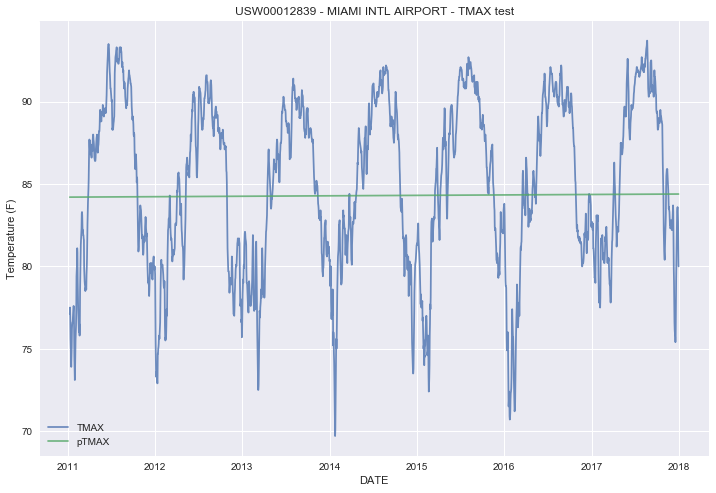

In [24]:
# Plot USW00012839, 1948-2017, Temperature on Test data - Smooth 30-day window
weather_test[['TMAX','pTMAX']].rolling(10).mean().plot(alpha=0.8, 
        figsize=(12,8), title='USW00012839 - MIAMI INTL AIRPORT - TMAX test');
plt.ylabel('Temperature (F)');

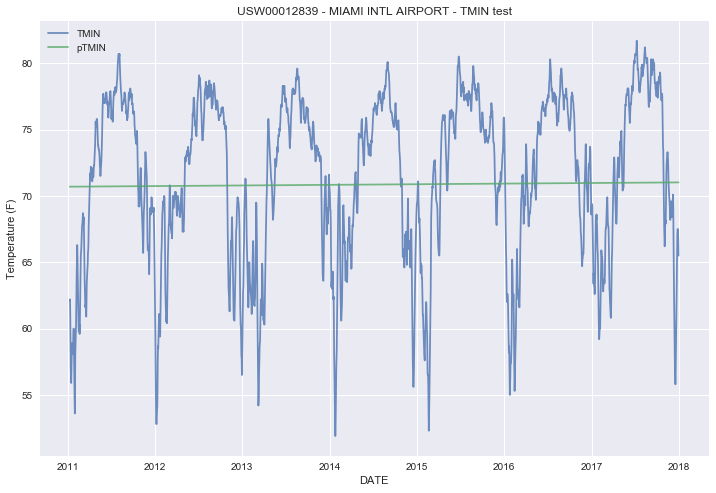

In [25]:
weather_test[['TMIN','pTMIN']].rolling(10).mean().plot(alpha=0.8, 
        figsize=(12,8), title='USW00012839 - MIAMI INTL AIRPORT - TMIN test');
plt.ylabel('Temperature (F)');


In [26]:
slope = model_mia_linear.coef_[1][0]
year_1 = slope * (365.25*24*60*60*10**9) * 1e-17
year_70 = slope * (365.25*24*60*60*10**9) * 1e-17 * 70
print("70-year temperature increase (F deg., MIA):", year_70)
print("Model slope (MIA):", slope, "(", year_1, "F degrees/ year)")

70-year temperature increase (F deg., MIA): 3.251718866134655
Model slope (MIA): 0.14720107568087085 ( 0.0464531266590665 F degrees/ year)


### MIAMI Warming

#### MIA temperature increase on input variable 'date'
* model slope: +0.14720108 (0.04645 F deg/ year)

#### MIA 70 year temperature increase (1948-2017): +3.25 F



### Linear Prediction Model - Part II, Yearly seasonality

* Training data: 1948-01-01 to 2010-12-31 (62 years)
* Time index is datetime(); 1 nanosecond time resolution
* Seasonality feature added, one year period, with phase delay
* Model input features: data index 'DATE', 'SEASON'



In [27]:
# Yearly season variation, with phase delay
def season_year(date):
    """Compute season signal for input date"""
    phase_lag = -36   # lag in days
    days = (date - pd.datetime(1900, 12, 21)).days
    m = np.cos((days + phase_lag) * 2 * np.pi / 365.25)
    return 0.0 + 12. * np.degrees(-m) / 180.


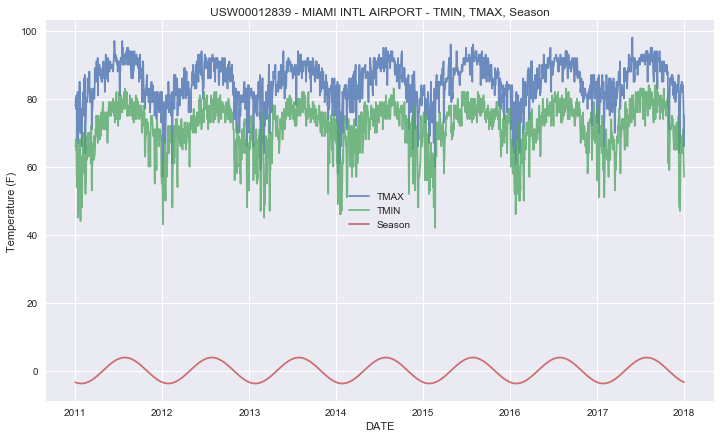

In [39]:
weather_season = weather_test
weather_season['Season'] = list(map(season_year, weather_season.index))

weather_season[['TMAX','TMIN','Season']].plot(alpha=0.8, 
    figsize=(12,7), title='USW00012839 - MIAMI INTL AIRPORT - TMIN, TMAX, Season')
plt.ylabel('Temperature (F)');

In [29]:
# Model score and coefficients: X as training date_range()
start_date = '1948-01-01'
end_date = '2010-12-31'
score_dates = pd.date_range(start_date, end_date)

X_train = pd.DataFrame(index=score_dates)
X_train['date'] = score_dates[:, np.newaxis].astype('float64') * 1e-17
X_train['season'] = list(map(season_year, score_dates))

y_train = weather[weather['STATION']=='USW00012839'][start_date:end_date][['TMAX','TMIN']]
X_train.head(3)

,date,season
1948-01-01,-6.943104,-3.451062
1948-01-02,-6.942240,-3.478714
1948-01-03,-6.941376,-3.505336


In [30]:
# Define and train season model
model_mia_season_linear = LinearRegression(fit_intercept=True)
model_mia_season_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Model score and coefficients: X, y data
print("model coef_:", model_mia_season_linear.coef_)
print("model intercept_:", model_mia_season_linear.intercept_)
print("model score:", model_mia_season_linear.score(X_train, y_train))

model coef_: [[0.08049687 1.86322531]
 [0.14143504 2.27883374]]
model intercept_: [83.11441566 68.80745451]
model score: 0.5549477478135421


### Model slope on 'date': +0.14143504

* vs. model slope +0.14720108 of previous model, with no seasonality

<hr/>
### Test linear model with seasonality

#### Test/Training data

* Training data: 1948-01-01 to 2010-12-31 (62 years)
* Test data: 2011-01-01 to 2017-12-31 (7 years)


In [32]:
# Model score and coefficients: X as Test date_range()
start_date = '2011-01-01'
end_date = '2017-12-31'
score_dates = pd.date_range(start_date, end_date)

X_test = pd.DataFrame(index=score_dates)
X_test['date'] = score_dates[:, np.newaxis].astype('float64') * 2e-17
X_test['season'] = list(map(season_year, score_dates))

y_test = weather[weather['STATION']=='USW00012839'][start_date:end_date][['TMAX','TMIN']]

In [33]:
# Predict on test data
y_test_predict = y_test
y_test_predict['pTMAX'] = model_mia_season_linear.predict(X_test)[:,0]
y_test_predict['pTMIN'] = model_mia_season_linear.predict(X_test)[:,1]
y_test_predict.head(3)

,TMAX,TMIN,pTMAX,pTMIN
DATE,,,,
2011-01-01,78.0,66.0,78.754252,64.586972
2011-01-02,78.0,66.0,78.703348,64.524787
2011-01-03,80.0,68.0,78.654365,64.464953


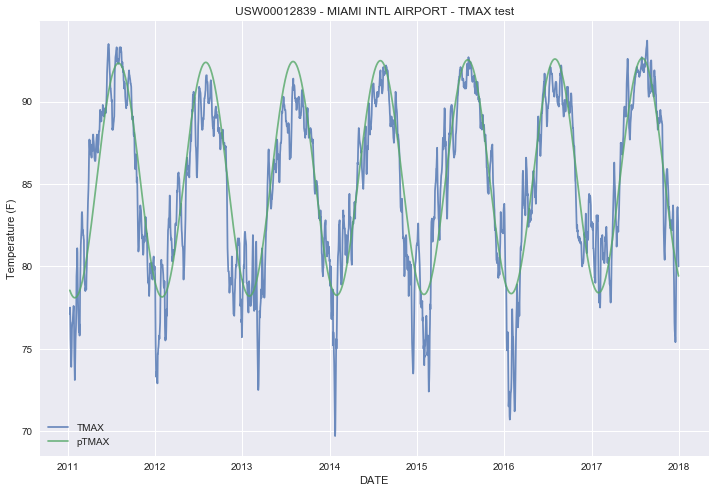

In [34]:
# MIA USW00012839, 1948-2017, Temperature on test data - 10-day moving average
y_test_predict[['TMAX','pTMAX']].rolling(10).mean().plot(alpha=0.8, 
        figsize=(12,8), title='USW00012839 - MIAMI INTL AIRPORT - TMAX test')
plt.ylabel('Temperature (F)');

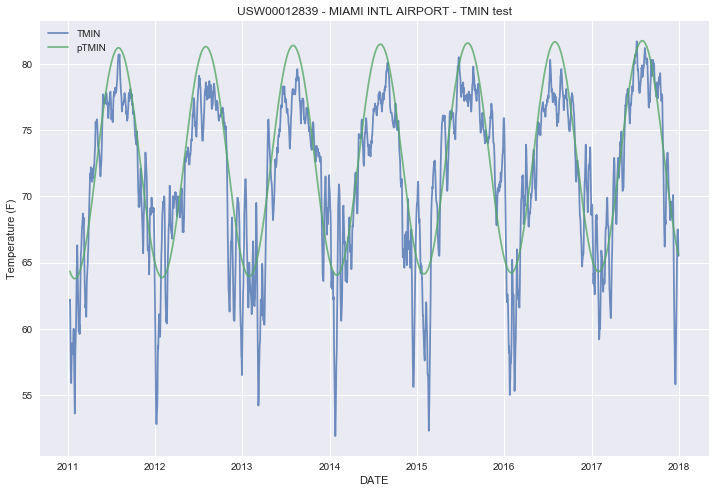

In [35]:
y_test_predict[['TMIN','pTMIN']].rolling(10).mean().plot(alpha=0.8, 
            figsize=(12,8), title='USW00012839 - MIAMI INTL AIRPORT - TMIN test')
plt.ylabel('Temperature (F)');

In [36]:
# Prediction error TMAX, TMIN, on Test data - Smooth 10-day rolling window
_, rmse_tmax = prediction_error(y_test_predict['TMAX'].rolling(10).mean(), y_test_predict['pTMAX'].rolling(10).mean())
_, rmse_tmin = prediction_error(y_test_predict['TMIN'].rolling(10).mean(), y_test_predict['pTMIN'].rolling(10).mean())
print("rmse_tmax (F):", rmse_tmax, ", rmse_tmin (F):", rmse_tmin)

rmse_tmax (F): 2.257642393411309 , rmse_tmin (F): 3.491547236253771


In [37]:
slope = model_mia_season_linear.coef_[1][0]
year_1 = slope * (365.25*24*60*60*10**9) * 1e-17
year_70 = slope * (365.25*24*60*60*10**9) * 1e-17 * 70
print("70-year temperature increase (F deg., MIA):", year_70)
print("Model slope (MIA):", slope, "(", year_1, "F deg/ year)")

70-year temperature increase (F deg., MIA): 3.1243452370680074
Model slope (MIA): 0.14143503747650588 ( 0.04463350338668582 F deg/ year)


### MIAMI Temperature increase on 'date' (model with seasonality)
* model slope: +0.14143504
* vs. previous model 0.14720108

#### MIA 70 year temperature increase: +3.12 F 
* vs. previous linear model, no seasonality +3.25 F



# Summary: Weather Prediction

We have presented a baseline linear weather prediction model with yearly seasonality.

## Error difference, linear only vs. seasonality

### Linear only model
* model_mia_linear.score: 0.008241949448928858
* rmse_tmax (F): 6.54348806133789 , rmse_tmin (F): 8.476266013127782


### Model with seasonality

* model_mia_season_linear.score: 0.5549477478135421
* rmse_tmax (F): 2.257642393411309 , rmse_tmin (F): 3.491547236253771



## Load Forecast continued (next notebook) ... 

* [PyDataMiami2019_ElectricLoadForecasting.ipynb](http://localhost:8888/notebooks/PyDataMiami2019/PyDataMiami2019_ElectricLoadForecasting.ipynb)
